In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [1]:
# GOOG = pd.read_excel('GOOG.xlsx', sheet_name='GOOG')
# BAC = pd.read_excel('BAC.xlsx', sheet_name='BAC')
# GS = pd.read_excel('GS.xlsx', sheet_name='GS')
# FB = pd.read_excel('FB.xlsx', sheet_name='FB')
# BA = pd.read_excel('BA.xlsx', sheet_name='BA')
# NKE = pd.read_excel('NKE.xlsx', sheet_name='NKE')
# AAPL = pd.read_excel('AAPL.xlsx', sheet_name='AAPL')

In [0]:
def data_processing(data):
    df = pd.DataFrame(data['Adj Close'])
    # 200 Days Moving Average
    MA_200 = df.ewm(span = 200).mean()
    data['200 Days Moving Average'] = MA_200
    MA_200

    # 26 Days Moving Average
    MA_26 = df.ewm(span = 26).mean()
    data['26 Days Moving Average'] = MA_26
    MA_26

    # 12 Days Moving Average
    MA_12 = df.ewm(span = 12).mean()
    data['12 Days Moving Average'] = MA_12
    MA_12

    # MACD
    MACD = data['12 Days Moving Average'] - data['26 Days Moving Average']
    data["MACD"] = MACD

    # Signal Line
    ds = data['MACD']
    Signal = ds.ewm(span = 9).mean()
    data['Signal'] = Signal

    # Momentum
    Momentum = data['MACD']-data['Signal']
    data['Momentum'] = Momentum

    data['Index'] = np.arange(len(data["Date"]))
    data['Return'] = np.array([0]+[(data['Adj Close'][i]-data['Adj Close'][0])/data['Adj Close'][0] for i in range(1, len(data['Adj Close']))])
    data["Momentum Change"] = np.array([0]+[data['Momentum'][i]-data['Momentum'][i-1] for i in range(1, len(data['Momentum']))])

In [0]:
data_processing(GOOG)
data_processing(BAC)
data_processing(GS)
data_processing(FB)
data_processing(BA)
data_processing(NKE)
data_processing(AAPL)

In [0]:
def main_2(data, param = 1.29, std = 1.576, cash = 50000000):
    share = int(cash/data['Adj Close'][0])
    init_share = int(cash/data['Adj Close'][0])
    init_value = share*data['Adj Close'][0]+cash
    print(f"initial shares = {init_share}")
    print(f"initial value of portfolio is {init_value}")
    shares_buy = 0
    value_buy = 0
    shares_sell = 0
    value_sell = 0
    pnl_record = np.array([])
    trade_date = []
    trade_share = []
    trade_b_or_s = []
    result = pd.DataFrame()
    for i in range(1, len(data["Date"])-1):
        if data["Momentum Change"][i] > 0.3*param*std:
            if cash >= 1000000:
                shares_buy = int(min(data["Momentum Change"][i]/(param*std), 1)*cash/data['Adj Close'][i])
                value_buy = shares_buy*data['Adj Close'][i]
#                print(f"{data['Date'][i+1]} buy {shares_buy} shares, benchmark price {value_buy} dollars")
                share += shares_buy
                cash -= value_buy
#                print(share, cash)
                      
                trade_date.append(data['Date'][i+1])
                trade_share.append(shares_buy)
                trade_b_or_s.append('b')
                      
            elif cash <= 1000000 and cash > data['Adj Close'][i]:
                shares_buy = int(cash/data["Adj Close"][i])
                value_buy = shares_buy*data["Adj Close"][i]
#                print(f"{data['Date'][i+1]} buy {shares_buy} shares, benchmark price {value_buy} dollars")
                share += shares_buy
                cash -= value_buy
#                print(share, cash)
                      
                trade_date.append(data['Date'][i+1])
                trade_share.append(shares_buy)
                trade_b_or_s.append('b')
                      
        elif data["Momentum Change"][i] < 0.3*param*std:
            if share >= 10000:
                shares_sell = int(min(abs(data["Momentum Change"][i])/(param*std), 1)*share)
                value_sell = shares_sell*data['Adj Close'][i]
#                print(f"{data['Date'][i+1]} sell {shares_sell} shares, benchmark price {value_sell} dollars")
                share -= shares_sell
                cash += value_sell
#                print(share, cash)
                trade_date.append(data['Date'][i+1])
                trade_share.append(shares_sell)
                trade_b_or_s.append('s')
            elif share <= 10000 and share > 0:
                shares_sell = share
                value_sell = share*data['Adj Close'][i]
#                print(f"{data['Date'][i+1]} sell {shares_sell} shares, benchmark price {value_sell} dollars")
                share -= shares_sell
                cash += value_sell
#                print(share, cash)
                trade_date.append(data['Date'][i+1])
                trade_share.append(shares_sell)
                trade_b_or_s.append('s')
        result = pd.DataFrame({'Date':trade_date, 'BorS':trade_b_or_s, 'Shares':trade_share})
        pnl_record = np.append(pnl_record, cash + share*data['Adj Close'][i])
    pnl_record -= (50000000 + init_share*data['Adj Close'][0])
    return_rate_record = pnl_record / (50000000 + init_share*data['Adj Close'][0])
#     plt.plot(pnl_record)
#     plt.show()
    print(len(return_rate_record))
    end_value = share*data['Adj Close'][i+1]+cash
    print(f"End value of portfolio is {end_value}")
    print(f"Portfolio return is {end_value/init_value-1}")
    print(f"Stock return is {(data['Adj Close'][i+1])/(data['Adj Close'][0])-1}")
    print(f"return difference is {end_value/init_value-(data['Adj Close'][i+1])/(data['Adj Close'][0])}")
    plt.figure(figsize=(24, 8))
    plt.plot(data['Date'][1:-1], data['Return'][1:-1], color = 'orange')
    plt.plot(data['Date'][1:-1], return_rate_record, linewidth=2.0)
    plt.title('Rate of Return')
    plt.show()
#     print(result)
#     return share*data['Adj Close'][313]+cash
    return result

initial shares = 52451
initial value of portfolio is 99999965.81902
312
End value of portfolio is 103340585.17725202
Portfolio return is 0.033406205000888534
Stock return is 0.08637632913285165
return difference is -0.052970124131963114


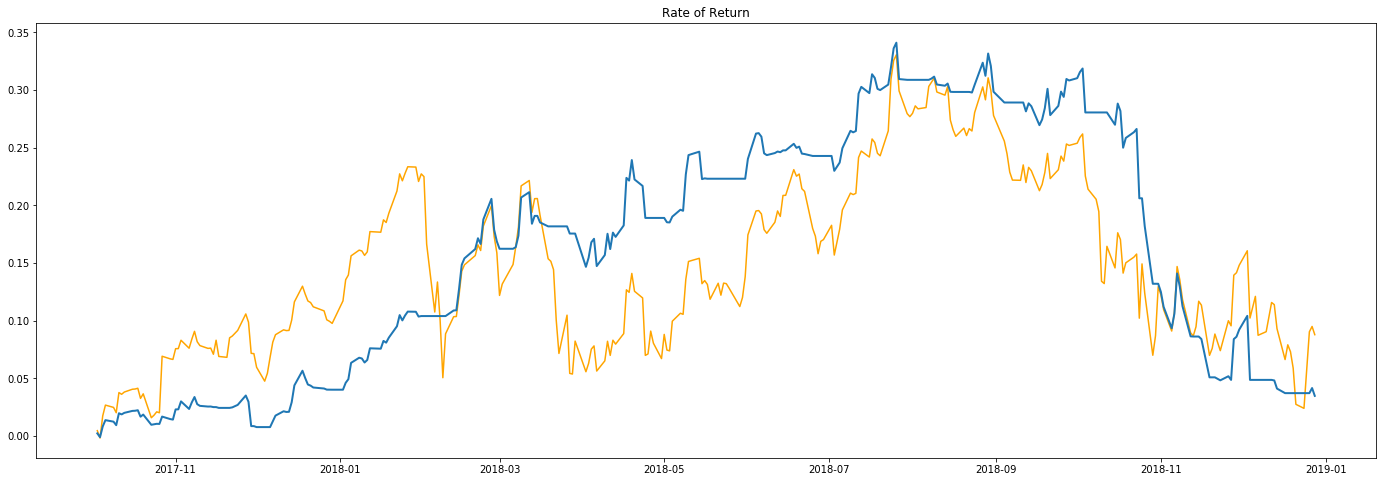

,Date,BorS,Shares
0,2017-10-04,b,1157
1,2017-10-05,s,3002
2,2017-10-06,b,10812
3,2017-10-09,b,7548
4,2017-10-10,b,406
5,2017-10-11,s,7212
6,2017-10-12,b,8875
7,2017-10-13,b,1497
8,2017-10-16,b,521
9,2017-10-17,b,337


In [0]:
main_2(GOOG, std = np.std(GOOG['Momentum Change']))

initial shares = 2006140
initial value of portfolio is 99999984.14877999
312
End value of portfolio is 109993123.17710298
Portfolio return is 0.09993140612357698
Stock return is -0.01639570594423878
return difference is 0.11632711206781576


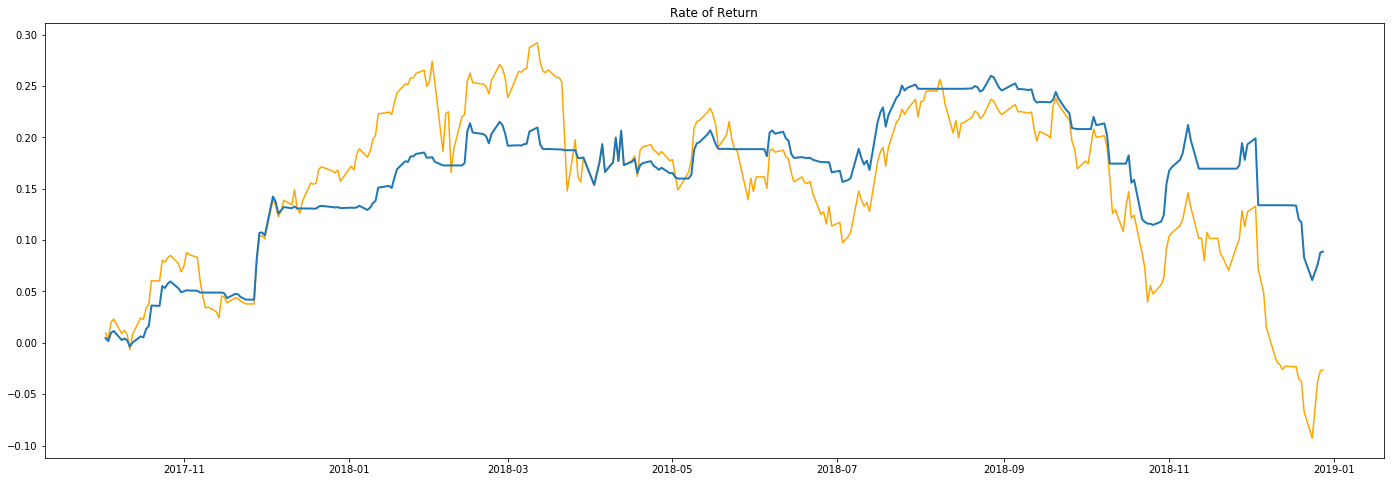

,Date,BorS,Shares
0,2017-10-04,b,99295
1,2017-10-05,s,125468
2,2017-10-06,b,382301
3,2017-10-09,b,154824
4,2017-10-10,s,562042
5,2017-10-11,s,115390
6,2017-10-12,s,199978
7,2017-10-13,s,582315
8,2017-10-16,b,447425
9,2017-10-17,b,1129431


In [0]:
main_2(BAC, std = np.std(BAC['Momentum Change']))

initial shares = 212147
initial value of portfolio is 99999803.74807599
312
End value of portfolio is 95736542.04019411
Portfolio return is -0.04263270074631431
Stock return is -0.2940648784052633
return difference is 0.251432177658949


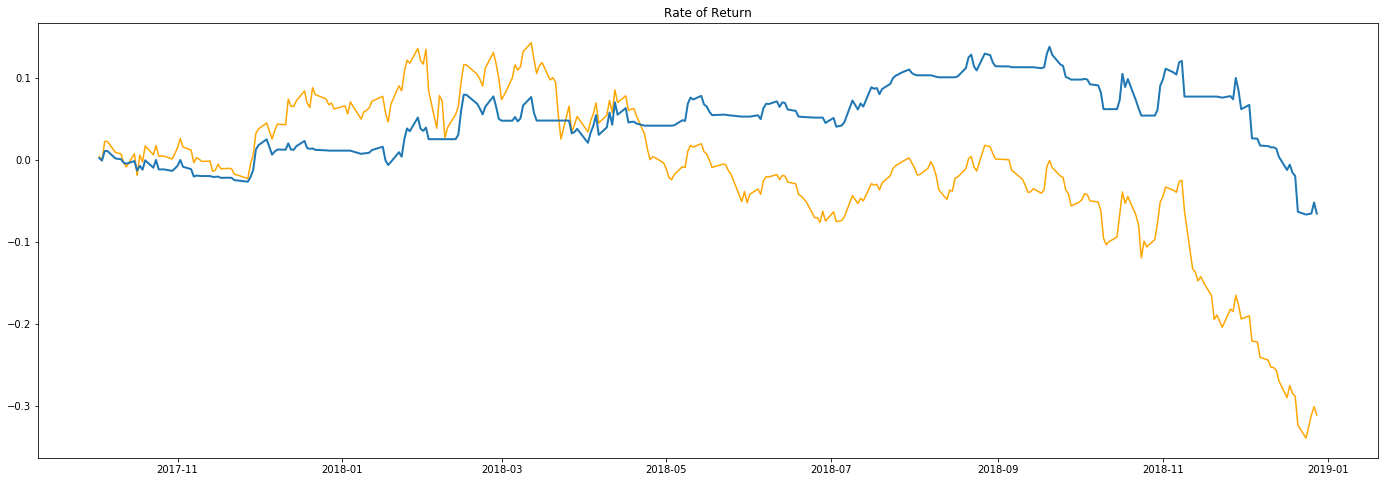

,Date,BorS,Shares
0,2017-10-04,b,5061
1,2017-10-05,s,13133
2,2017-10-06,b,70419
3,2017-10-09,b,12449
4,2017-10-10,s,72462
5,2017-10-11,s,32862
6,2017-10-12,s,17772
7,2017-10-13,s,47830
8,2017-10-16,s,30060
9,2017-10-17,b,100053


In [0]:
main_2(GS, std = np.std(GS['Momentum Change']))

initial shares = 295037
initial value of portfolio is 99999920.685037
312
End value of portfolio is 73025735.18260998
Portfolio return is -0.26974206897009245
Stock return is -0.22647078995414638
return difference is -0.043271279015946074


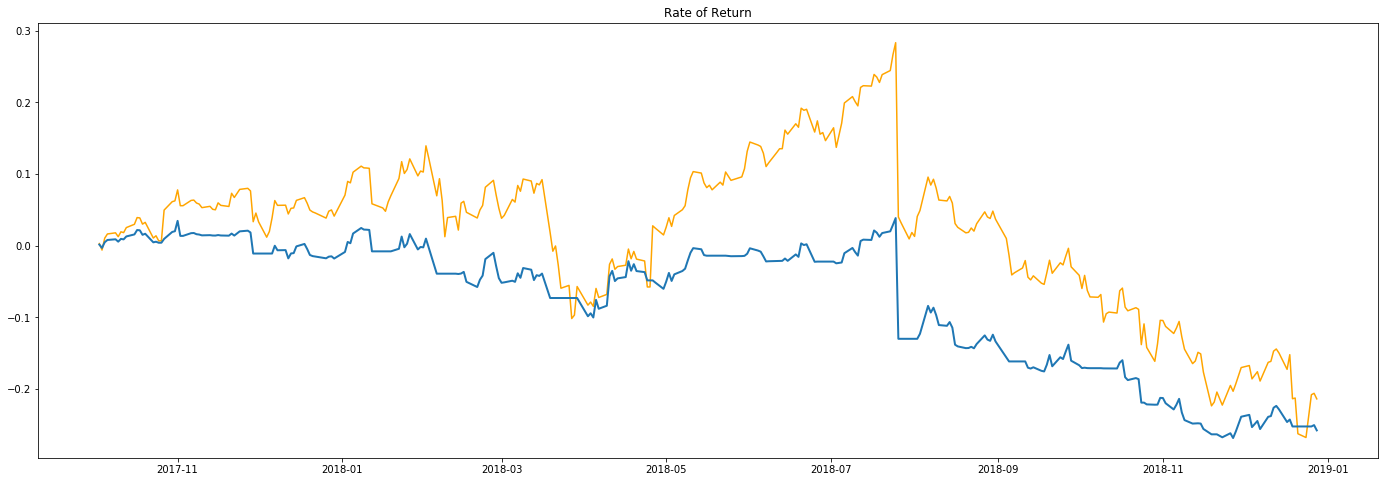

,Date,BorS,Shares
0,2017-10-04,b,3373
1,2017-10-05,s,19896
2,2017-10-06,b,45129
3,2017-10-09,b,28739
4,2017-10-10,b,10802
5,2017-10-11,s,26994
6,2017-10-12,b,10585
7,2017-10-13,s,4908
8,2017-10-16,b,20576
9,2017-10-17,b,21966


In [0]:
main_2(FB, std = np.std(FB['Momentum Change']))

initial shares = 201230
initial value of portfolio is 99999983.73491
312
End value of portfolio is 110484380.573289
Portfolio return is 0.10484398543675866
Stock return is 0.29144601940911485
return difference is -0.1866020339723562


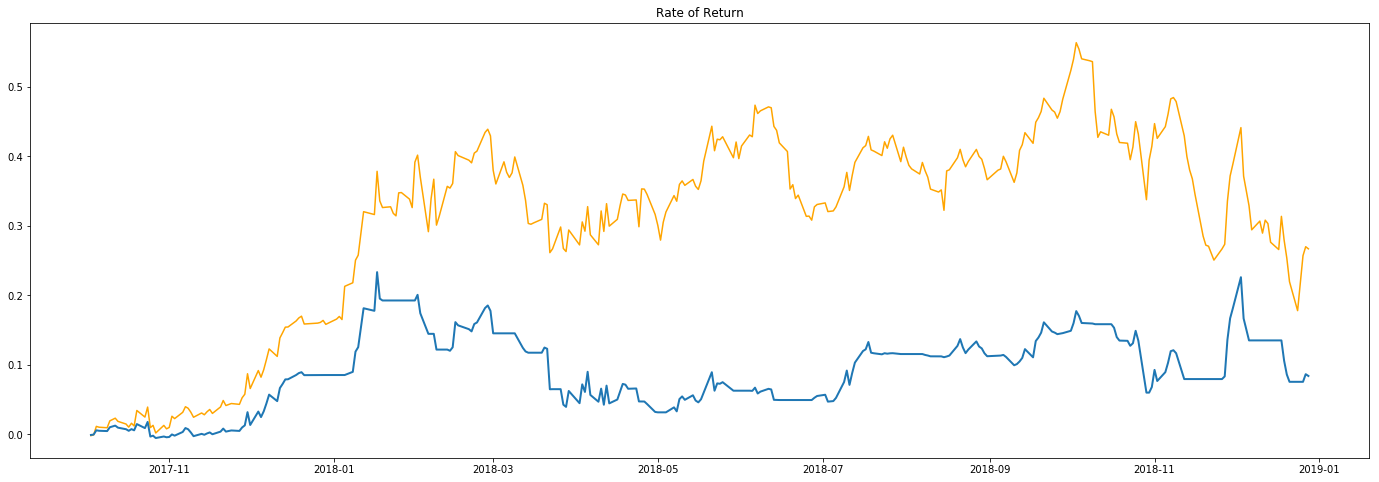

,Date,BorS,Shares
0,2017-10-04,s,1578
1,2017-10-05,b,1726
2,2017-10-06,b,22570
3,2017-10-09,b,2897
4,2017-10-10,s,3625
5,2017-10-11,b,18954
6,2017-10-12,b,9665
7,2017-10-13,b,5089
8,2017-10-16,s,19838
9,2017-10-17,s,29904


In [0]:
main_2(BA, std = np.std(BA['Momentum Change']))

initial shares = 980591
initial value of portfolio is 99999958.543056
312
End value of portfolio is 107223726.73121706
Portfolio return is 0.07223771182915839
Stock return is 0.45029015319511334
return difference is -0.37805244136595495


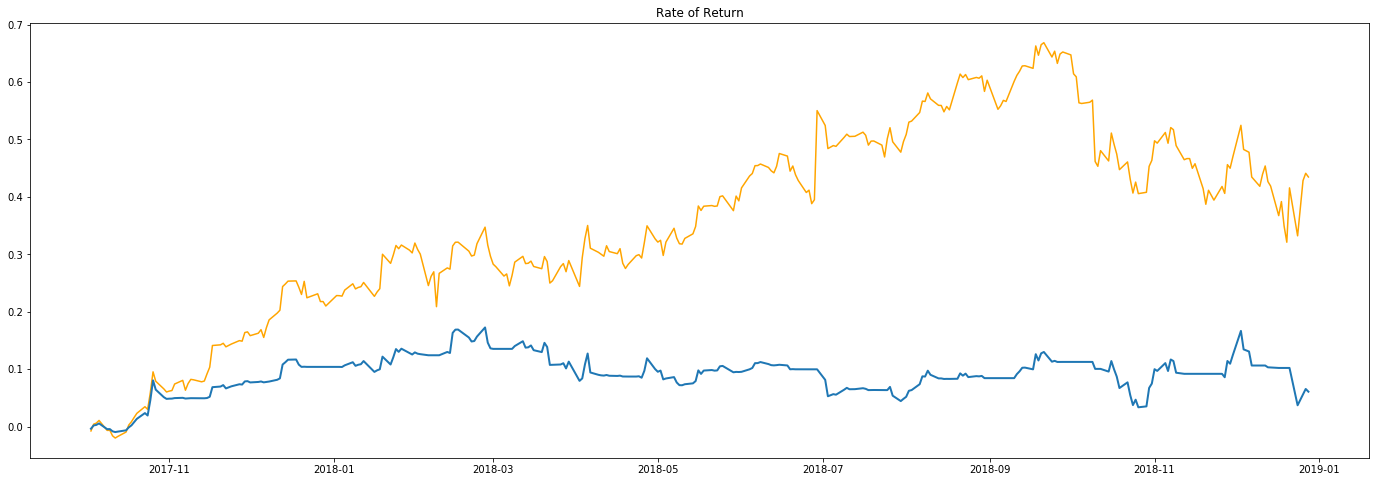

,Date,BorS,Shares
0,2017-10-04,s,32077
1,2017-10-05,b,93829
2,2017-10-06,b,35353
3,2017-10-09,b,50203
4,2017-10-10,s,250431
5,2017-10-11,s,86902
6,2017-10-12,s,146981
7,2017-10-13,s,86698
8,2017-10-16,b,16261
9,2017-10-17,b,244077


In [0]:
main_2(NKE, std = np.std(NKE['Momentum Change']))

initial shares = 332563
initial value of portfolio is 99999976.400066
312
End value of portfolio is 97261778.24291992
Portfolio return is -0.02738198803359193
Stock return is 0.044689797125965214
return difference is -0.07207178515955714


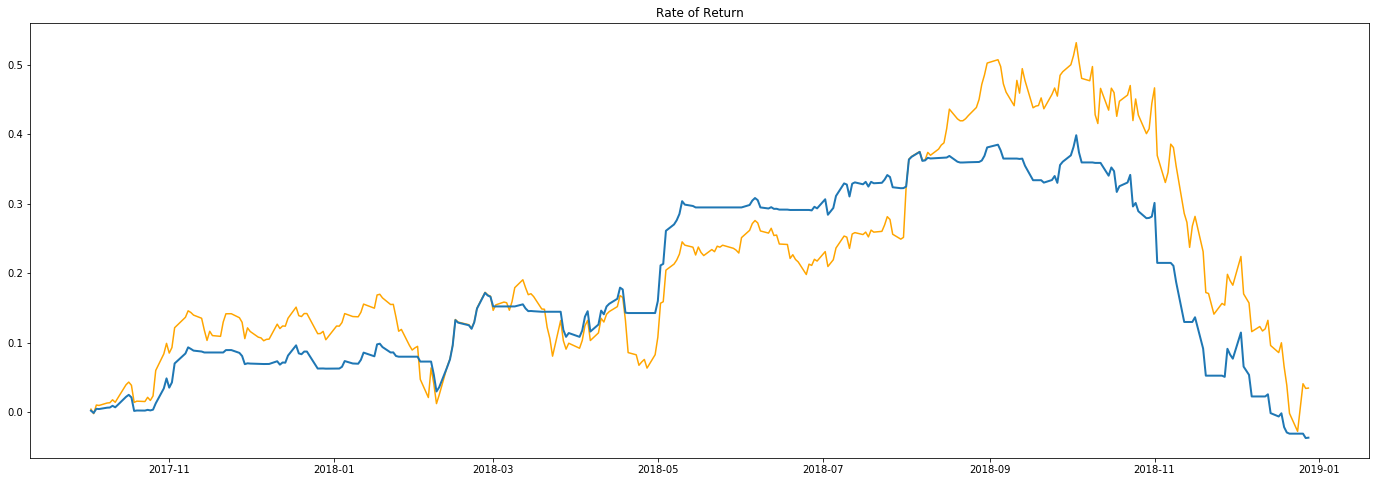

,Date,BorS,Shares
0,2017-10-04,b,6439
1,2017-10-05,s,18361
2,2017-10-06,b,41426
3,2017-10-09,b,8472
4,2017-10-10,b,14129
5,2017-10-11,b,3550
6,2017-10-12,b,15783
7,2017-10-13,s,20568
8,2017-10-16,b,19376
9,2017-10-17,b,92526


In [0]:
main_2(AAPL, std = np.std(AAPL['Momentum Change']))